https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies/notebook#14.2-Visualizing-Model-Performance

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

%matplotlib inline

In [136]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_boston = pd.read_csv('datasets/housing.csv', header = None, delimiter = r"\s+", names = column_names)

raw_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [137]:
raw_bmi = pd.read_csv('datasets/bmi.csv')
raw_bmi['Gender'] = raw_bmi['Gender'].map({'Male':0, 'Female':1})
print(raw_bmi)

     Gender  Height  Weight  Index
0         0     174      96      4
1         0     189      87      2
2         1     185     110      4
3         1     195     104      3
4         0     149      61      3
..      ...     ...     ...    ...
495       1     150     153      5
496       1     184     121      4
497       1     141     136      5
498       0     150      95      5
499       0     173     131      5

[500 rows x 4 columns]


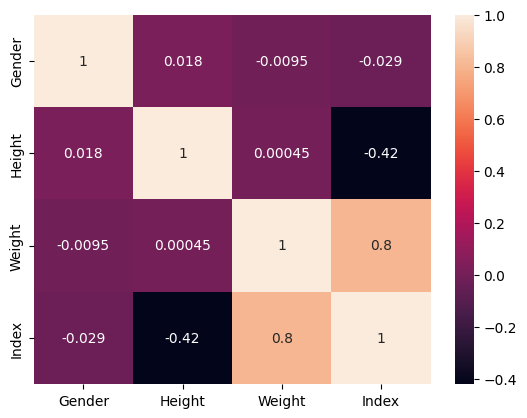

In [138]:
heatmap = sns.heatmap(raw_bmi.corr(), annot=True)

<Axes: >

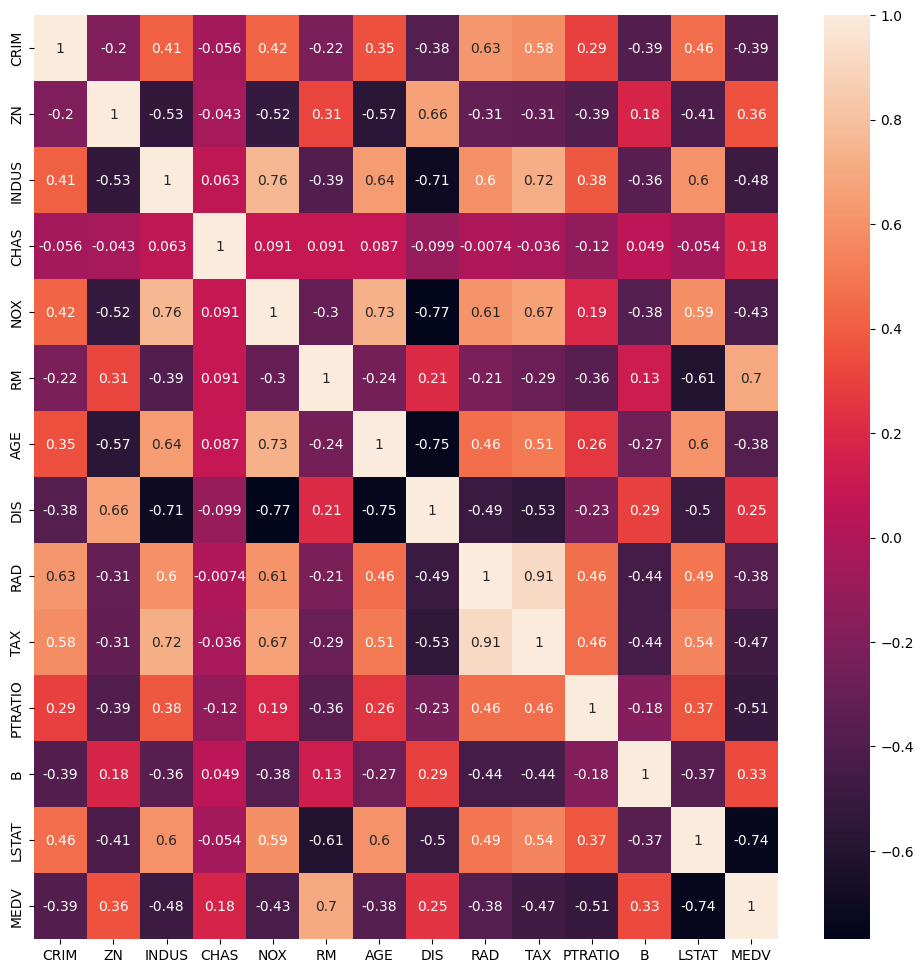

In [139]:
plt.figure(figsize=(12, 12))
sns.heatmap(raw_boston.corr(), annot=True)

<H1> VIF - Variance inflation factor </H1>

VIF defines how well a particular predictor (X, feature) is predicted by other features in the dataset. VIF can range from 0 to inf. Inf means that a feature is completely predictable by other features.

In general a VIF > 5 denotes high colinearity and >10 is extreme. Features with >10 VIF can be removed from the dataset before training.
VIF = 1/(1-R^2)

In [140]:
# the independent variables set
X = raw_bmi[['Gender', 'Height', 'Weight', 'Index']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Feature,VIF
0,Gender,2.031010
1,Height,11.941301
2,Weight,40.024880
3,Index,25.143752


In [141]:
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
vif2_data

vif2_data.sort_values(by="VIF")



,Feature,VIF
3,CHAS,1.152952
0,CRIM,2.100373
1,ZN,2.844013
12,LSTAT,11.102025
2,INDUS,14.485758
7,DIS,14.699652
8,RAD,15.167725
11,B,20.104943
6,AGE,21.386850
9,TAX,61.227274


In [142]:
from sklearn.preprocessing import StandardScaler

scaled_boston = raw_boston.copy()
scalar = StandardScaler()

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features = raw_boston[col_names]

features = scalar.fit_transform(features)
scaled_boston[col_names] = features



In [143]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [146]:
cv_lm = cross_val_score(estimator = linear_model, X=X_train, y=y_train, cv=10)

R2 = linear_model.score(X=X_test, y=y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_R2 = 1 - (1-r2)*(n-1)/(n-p-1)

lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = metrics.r2_score(y_test, y_pred)

print('RMSE: ', lm_RMSE)
print('R2: ', lm_R2)
print('Adjusted R2: ', adjusted_R2)
print('Cross validated R2: ', cv_lm.mean())

RMSE:  4.638689926172822
R2:  0.7112260057484932
Adjusted R2:  0.6337145021563346
Cross validated R2:  0.687534695114113


Text(0, 0.5, 'y_pred')

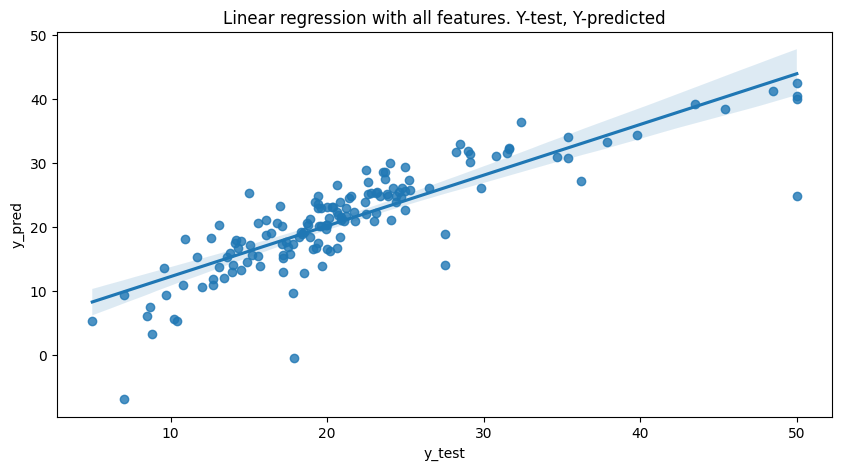

In [147]:
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred)
plt.title('Linear regression with all features. Y-test, Y-predicted')
plt.xlabel('y_test')
plt.ylabel('y_pred')

<H2> Linear regression with dropped features obtained via VIF </h2>

RMSE: 4.994329997173638
R2: 0.665249015215723
Adjusted R2: 0.6415078106210934
Cross Validated R2:  0.6432178557479722


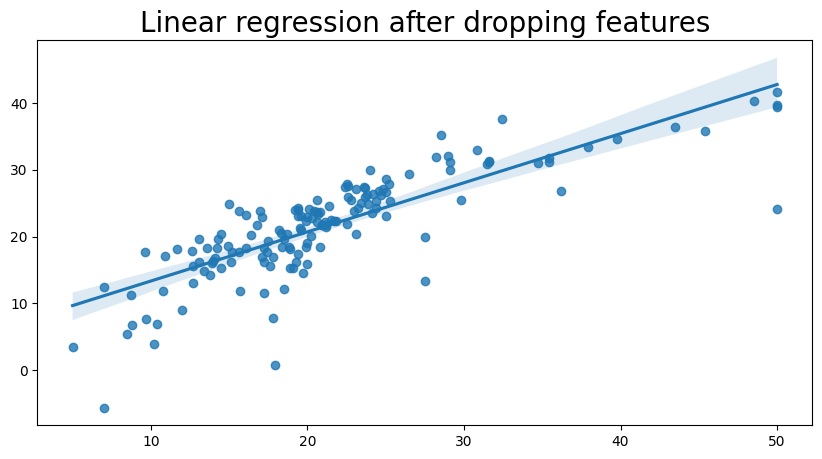

In [148]:
scaled_boston2 = scaled_boston.copy()
scaled_boston2 = scaled_boston2.drop(['NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'], axis=1)

X = scaled_boston2.iloc[:, :-1].values
y = scaled_boston2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm2.predict(X_test)
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression after dropping features', fontsize = 20)

# Predicting Cross Validation Score
cv_lm2 = cross_val_score(estimator = lm2, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm2.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm2_adjusted_R2 = 1-(1-r2)*(n-1)/(n-p-1)
lm2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm2_R2 = lm2.score(X_test, y_test)
lm2CV_R2 = cv_lm2.mean()

print('RMSE:', lm2_RMSE)
print('R2:', lm2_R2)
print('Adjusted R2:', lm2_adjusted_R2 )
print("Cross Validated R2: ", cv_lm2.mean())


In [149]:
data = {
    'RMSE': [lm_RMSE, lm2_RMSE],
    'R2': [lm_R2, lm2_R2],
    'Adjusted R2': [adjusted_R2, lm2_adjusted_R2],
    'Cross Validated R2': [cv_lm.mean(), cv_lm2.mean()],
}
rows = ['base', 'with vif']
df = pd.DataFrame(data, index=rows)
df

,RMSE,R2,Adjusted R2,Cross Validated R2
base,4.63869,0.711226,0.633715,0.687535
with vif,4.99433,0.665249,0.641508,0.643218


<H3> Results of VIF are dogshit as seen above </h3>

<h1> RFE - Recursive feature elimination </h1>

Recursive Feature Elimination (RFE) is a backward feature selection algorithm.

The algorithn eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features, determined by either the coef_ or featureimportances attribute of the fitted model.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

Not all models can be paired with the RFE method, and some models benefit more from RFE than others. Because RFE requires that the initial model uses the full predictor set, then some models cannot be used when the number of predictors exceeds the number of samples. These models include multiple linear regression, logistic regression, and linear discriminant analysis. If we desire to use one of these techniques with RFE, then the predictors must first be winnowed down. In addition, some models benefit more from the use of RFE than others. Random forest is one such model (Svetnik et al. 2003).

Backwards selection is frequently used with random forest models for two reasons:

random forest tends not to exclude variables from the prediction equation;
it has an internal method for measuring feature importance.

In [151]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
model = LinearRegression()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
rf_pipeline.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)
# Predicting Cross Validation Score
cv_rf_pipeline = cross_val_score(estimator = rf_pipeline, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = rf_pipeline.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
rf_pipeline_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf_pipeline_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf_pipeline_R2 = rf_pipeline.score(X_test, y_test)
rf_pipelineCV_R2 = cv_rf_pipeline.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( rf_pipeline.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf_pipeline_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf_pipeline.mean(),4) )


RMSE: 4.7645
R2: 0.6954
Adjusted R2: 0.6667
Cross Validated R2:  0.6603


In [156]:
data = {
    'RMSE': [lm_RMSE, rf_pipeline_RMSE],
    'R2': [lm_R2, rf_pipeline_R2],
    'Adjusted R2': [adjusted_R2, rf_pipeline_adjusted_r2],
    'Cross Validated R2': [cv_lm.mean(), rf_pipelineCV_R2],
}
rows = ['base', 'with RFE']
df = pd.DataFrame(data, index=rows)
df

,RMSE,R2,Adjusted R2,Cross Validated R2
base,4.63869,0.711226,0.633715,0.687535
with RFE,4.76447,0.695353,0.666655,0.660342
